Loading and preprocessing data...
Vectorizing text data...
Training Logistic Regression...
Logistic Regression training time: 0.08 seconds
Training Random Forest...
Random Forest training time: 6.69 seconds
Training Naive Bayes...
Naive Bayes training time: 0.01 seconds
Evaluating Logistic Regression...
Logistic Regression Model Accuracy: 0.87
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       999
           1       0.85      0.90      0.87      1001

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



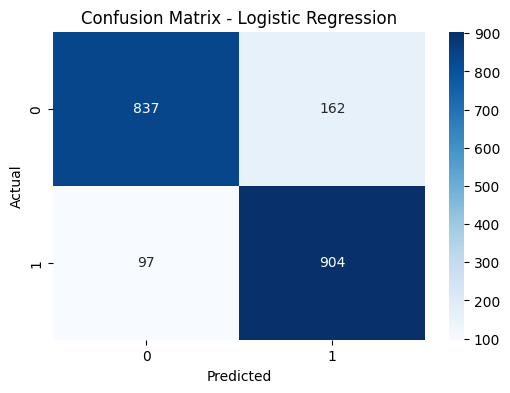

Evaluating Random Forest...
Random Forest Model Accuracy: 0.82
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       999
           1       0.83      0.81      0.82      1001

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



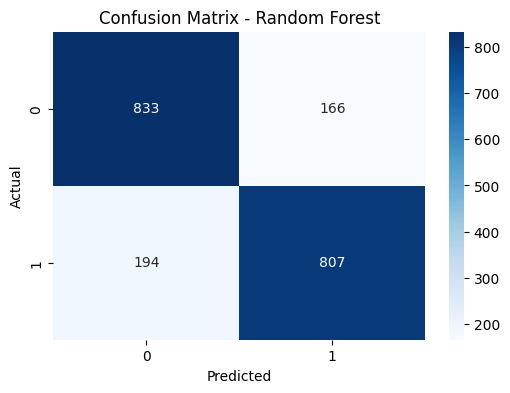

Evaluating Naive Bayes...
Naive Bayes Model Accuracy: 0.85
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       999
           1       0.85      0.86      0.85      1001

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



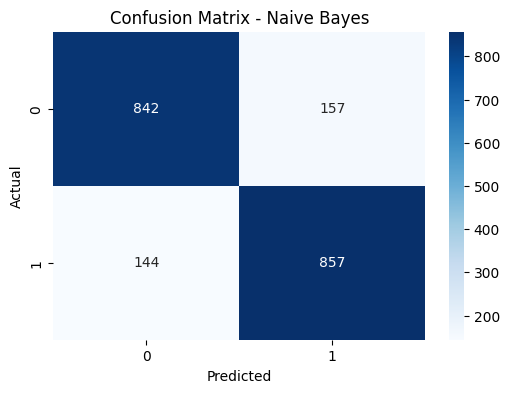

Choose a model for prediction:
1. Logistic Regression
2. Random Forest
3. Naive Bayes


KeyboardInterrupt: Interrupted by user

In [ ]:

# Install required packages
!pip install -q nltk scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Load a subset of the IMDB dataset
def load_data(n_samples=10000):
    url = "https://raw.githubusercontent.com/omaarelsherif/Movie-Reviews-Sentiment-Analysis-Using-Machine-Learning/refs/heads/main/Dataset/IMDB.csv"
    df = pd.read_csv(url)
    return df.sample(n=n_samples, random_state=42)

# Clean the text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Load and preprocess the data
print("Loading and preprocessing data...")
df = load_data()
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['clean_review'] = df['review'].apply(clean_text)
X = df['clean_review']
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
print("Vectorizing text data...")
tfidf = TfidfVectorizer(max_features=3000)  # Reduced from 5000
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train models
def train_models():
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
        'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),  # Reduced from 100
        'Naive Bayes': MultinomialNB()
    }

    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train_tfidf, y_train)
        training_time = time.time() - start_time
        print(f"{name} training time: {training_time:.2f} seconds")

    return models

models = train_models()

# Evaluate models
def evaluate_model(model, name):
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy

for name, model in models.items():
    evaluate_model(model, name)

# Function to predict sentiment for a given review
def predict_sentiment(review, model):
    cleaned_review = clean_text(review)
    tfidf_vector = tfidf.transform([cleaned_review])
    prediction = model.predict(tfidf_vector)[0]
    return "Positive" if prediction == 1 else "Negative"

# Interactive sentiment prediction
print("Choose a model for prediction:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

model_choice = input("Enter your choice (1-3): ")

chosen_model = list(models.values())[int(model_choice) - 1]
model_name = list(models.keys())[int(model_choice) - 1]

print(f"\nUsing {model_name} for predictions.\n")

while True:
    user_review = input("Enter your movie review (or 'quit' to exit): ")
    if user_review.lower() == 'quit':
        break
    sentiment = predict_sentiment(user_review, chosen_model)
    print(f"Predicted sentiment: {sentiment}")

# Batch prediction function
def batch_predict(reviews, model):
    cleaned_reviews = [clean_text(review) for review in reviews]
    tfidf_vectors = tfidf.transform(cleaned_reviews)
    predictions = model.predict(tfidf_vectors)
    return ["Positive" if pred == 1 else "Negative" for pred in predictions]

# Example usage of batch prediction
sample_reviews = [
    "This movie was amazing! I loved every minute of it.",
    "Terrible acting and a boring plot. Waste of time.",
    "An instant classic. The cinematography was breathtaking."
]

print("\nBatch Prediction Example:")
batch_results = batch_predict(sample_reviews, chosen_model)
for review, sentiment in zip(sample_reviews, batch_results):
    print(f"Review: {review}\nSentiment: {sentiment}\n")